In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import corner
import copy
import pickle
from astropy.io import ascii

%matplotlib inline

## Definitions of fields can be found at:
### confirmed planets:
https://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html
### KOIs:
https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

In [5]:
KOIs = ascii.read("../../../KOIs_chen2018_goodSystems_incJupiters.csv")
print(KOIs)
print(len(KOIs.colnames))
print(KOIs.colnames)

 kepid   kepoi_name  kepler_name  ...   koi_pmass_err1      koi_pmass_err2  
-------- ---------- ------------- ... ------------------ -------------------
10797460  K00752.01  Kepler-227 b ...  5.261814592254313  2.8703783039770117
10797460  K00752.02  Kepler-227 c ... 6.7785302895640065   3.923334976334421
10811496  K00753.01            -- ...  19.08588364750736  19.177135554994862
10854555  K00755.01  Kepler-664 b ...  9.498445997580454  4.8713861600863515
10872983  K00756.01  Kepler-228 d ... 19.406068501847614   9.498445997580454
10872983  K00756.02  Kepler-228 c ... 10.184449523887755   4.737521184231295
10872983  K00756.03  Kepler-228 b ...  3.862509973625066  1.8110862723308965
10910878  K00757.01  Kepler-229 c ...  23.10230908649195    12.3348973880334
11446443  K00001.01    Kepler-1 b ... 12218.949453567724  1371.0969835108908
10666592  K00002.01    Kepler-2 b ...  31468.11475482906   721.4265728875714
     ...        ...           ... ...                ...                 ...

In [6]:
print(len(np.array(KOIs['kepid'])))
print(len(np.unique(np.array(KOIs['kepid']))))

print(len(np.array(KOIs['koi_prad'])[~np.isnan(KOIs["koi_prad"])]))
print(len(np.array(KOIs['koi_ror'])[~np.isnan(KOIs["koi_ror"])]))
print(len(np.array(KOIs['koi_insol'])[~np.isnan(KOIs["koi_insol"])]))

3690
2804
3690
3690
3690


3690
2804


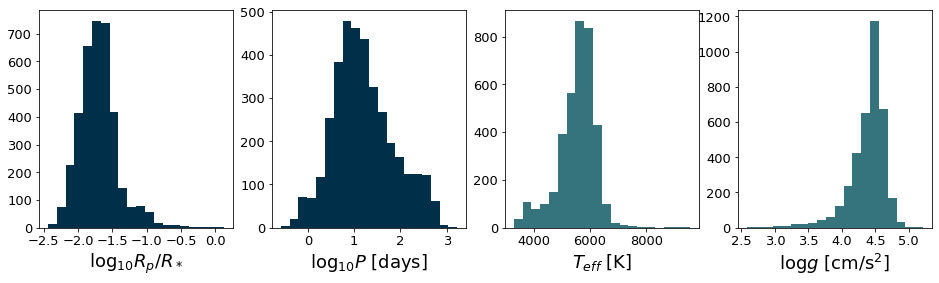

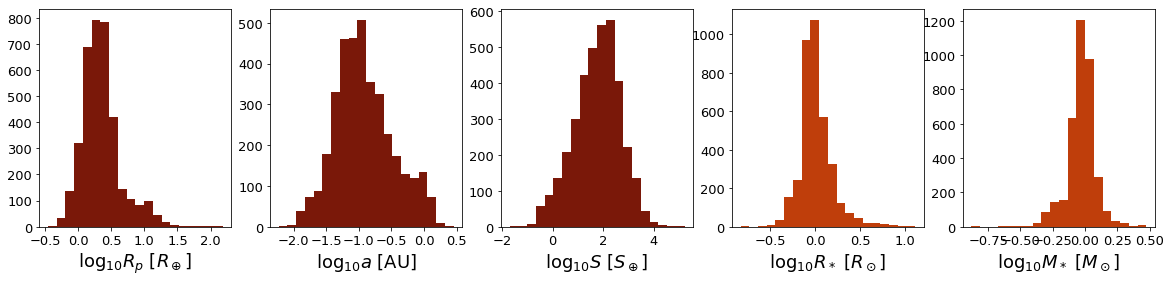

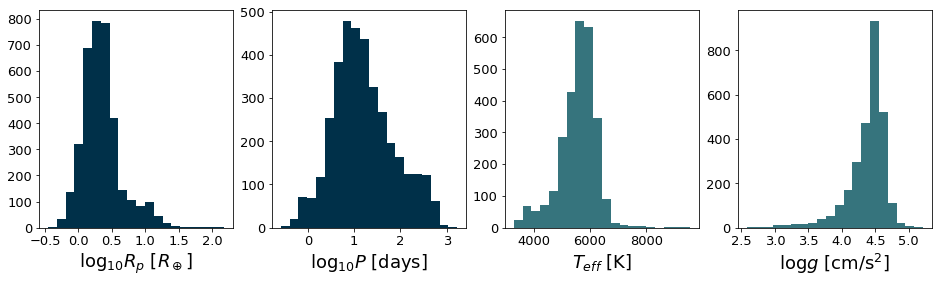

In [7]:
obs_labels = [r'$\log_{10}R_p/R_*$',r'$\log_{10}P$ [days]',r'$T_{eff}$ [K]',r'$\log{g}\ [\mathrm{cm}/\mathrm{s}^2]$']
obs_features = np.vstack((np.log10(np.array(KOIs['koi_ror'])).T,np.log10(np.array(KOIs['koi_period'])).T,np.array(KOIs['koi_steff']).T,np.array(KOIs['koi_slogg']).T)).T
mod_labels = [r'$\log_{10}R_p\ [R_\oplus]$',r'$\log_{10}a$ [AU]',r'$\log_{10}S\ [S_\oplus]$',r'$\log_{10}R_*\ [R_\odot]$',r'$\log_{10}M_*\ [M_\odot]$']
mod_features = np.vstack((np.log10(np.array(KOIs['koi_prad'])).T,np.log10(np.array(KOIs['koi_sma'])).T,np.log10(np.array(KOIs['koi_insol'])).T,np.log10(np.array(KOIs['koi_srad'])).T,np.log10(np.array(KOIs['koi_smass'])).T)).T
final_labels = [r'$\log_{10}R_p\ [R_\oplus]$',r'$\log_{10}P$ [days]',r'$T_{eff}$ [K]',r'$\log{g}\ [\mathrm{cm}/\mathrm{s}^2]$']
final_features = np.vstack((np.log10(np.array(KOIs['koi_prad'])).T,np.log10(np.array(KOIs['koi_period'])).T,np.array(KOIs['koi_steff']).T,np.array(KOIs['koi_slogg']).T)).T


# observed features
fig, axes = plt.subplots(1,4,figsize=(16,4))
for i in range(2):
    axes[i].hist(obs_features[:,i],bins=20,color='#003049',alpha=1)
    axes[i].set_xlabel(obs_labels[i],fontsize=18)
    for tick in axes[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
        
for i in range(2,4):
    axes[i].hist(obs_features[:,i],bins=20,color='#36747d',alpha=1)
    axes[i].set_xlabel(obs_labels[i],fontsize=18)
    for tick in axes[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
#plt.show()
plt.savefig("./obsFeaturesHist_incJ.pdf",fmt="pdf",bbox_inches="tight")

# modeled features
fig, axes = plt.subplots(1,5,figsize=(20,4))
for i in range(3):
    axes[i].hist(mod_features[:,i],bins=20,color='#7a1809',alpha=1)
    axes[i].set_xlabel(mod_labels[i],fontsize=18)
    for tick in axes[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
        
for i in range(3,5):
    axes[i].hist(mod_features[:,i],bins=20,color='#bf3e0b',alpha=1)
    axes[i].set_xlabel(mod_labels[i],fontsize=18)
    for tick in axes[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
#plt.show()
plt.savefig("./modFeaturesHist_incJ.pdf",fmt="pdf",bbox_inches="tight")


# final features
fig, axes = plt.subplots(1,4,figsize=(16,4))
for i in range(2):
    axes[i].hist(final_features[:,i],bins=20,color='#003049',alpha=1)
    axes[i].set_xlabel(final_labels[i],fontsize=18)
    for tick in axes[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
        


unique_IDs, unique_idxs = np.unique(np.array(KOIs['kepid']),return_index=True)
print(len(final_features[:,2]))
print(len(final_features[:,2][unique_idxs]))

for i in range(2,4):
    axes[i].hist(final_features[:,i][unique_idxs],bins=20,color='#36747d',alpha=1)
    axes[i].set_xlabel(final_labels[i],fontsize=18)
    for tick in axes[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
#plt.show()
plt.savefig("./finalFeaturesHist_incJ.pdf",fmt="pdf",bbox_inches="tight")


## Want these in a format:
### each row = 1 planetary system, i.e. a list of "planets"
### each "planet" = an array of [Rp/Rstar, P, Teff, logg, Fe/H]

In [8]:
obs_features = np.vstack((np.log10(np.array(KOIs['koi_ror'])).T,np.log10(np.array(KOIs['koi_period'])).T,np.array(KOIs['koi_steff']).T,np.array(KOIs['koi_slogg']).T)).T
mod_features = np.vstack((np.log10(np.array(KOIs['koi_prad'])).T,np.log10(np.array(KOIs['koi_sma'])).T,np.log10(np.array(KOIs['koi_insol'])).T,np.log10(np.array(KOIs['koi_srad'])).T,np.log10(np.array(KOIs['koi_smass'])).T)).T
final_features = np.vstack((np.log10(np.array(KOIs['koi_prad'])).T,np.log10(np.array(KOIs['koi_period'])).T,np.array(KOIs['koi_steff']).T,np.array(KOIs['koi_slogg']).T)).T

print(np.shape(obs_features))
print(np.shape(mod_features))
print(np.shape(final_features))

(3690, 4)
(3690, 5)
(3690, 4)


2656
1859
797
3548044
3
3645438
3
5792202
5
7219825
3
11709124
6


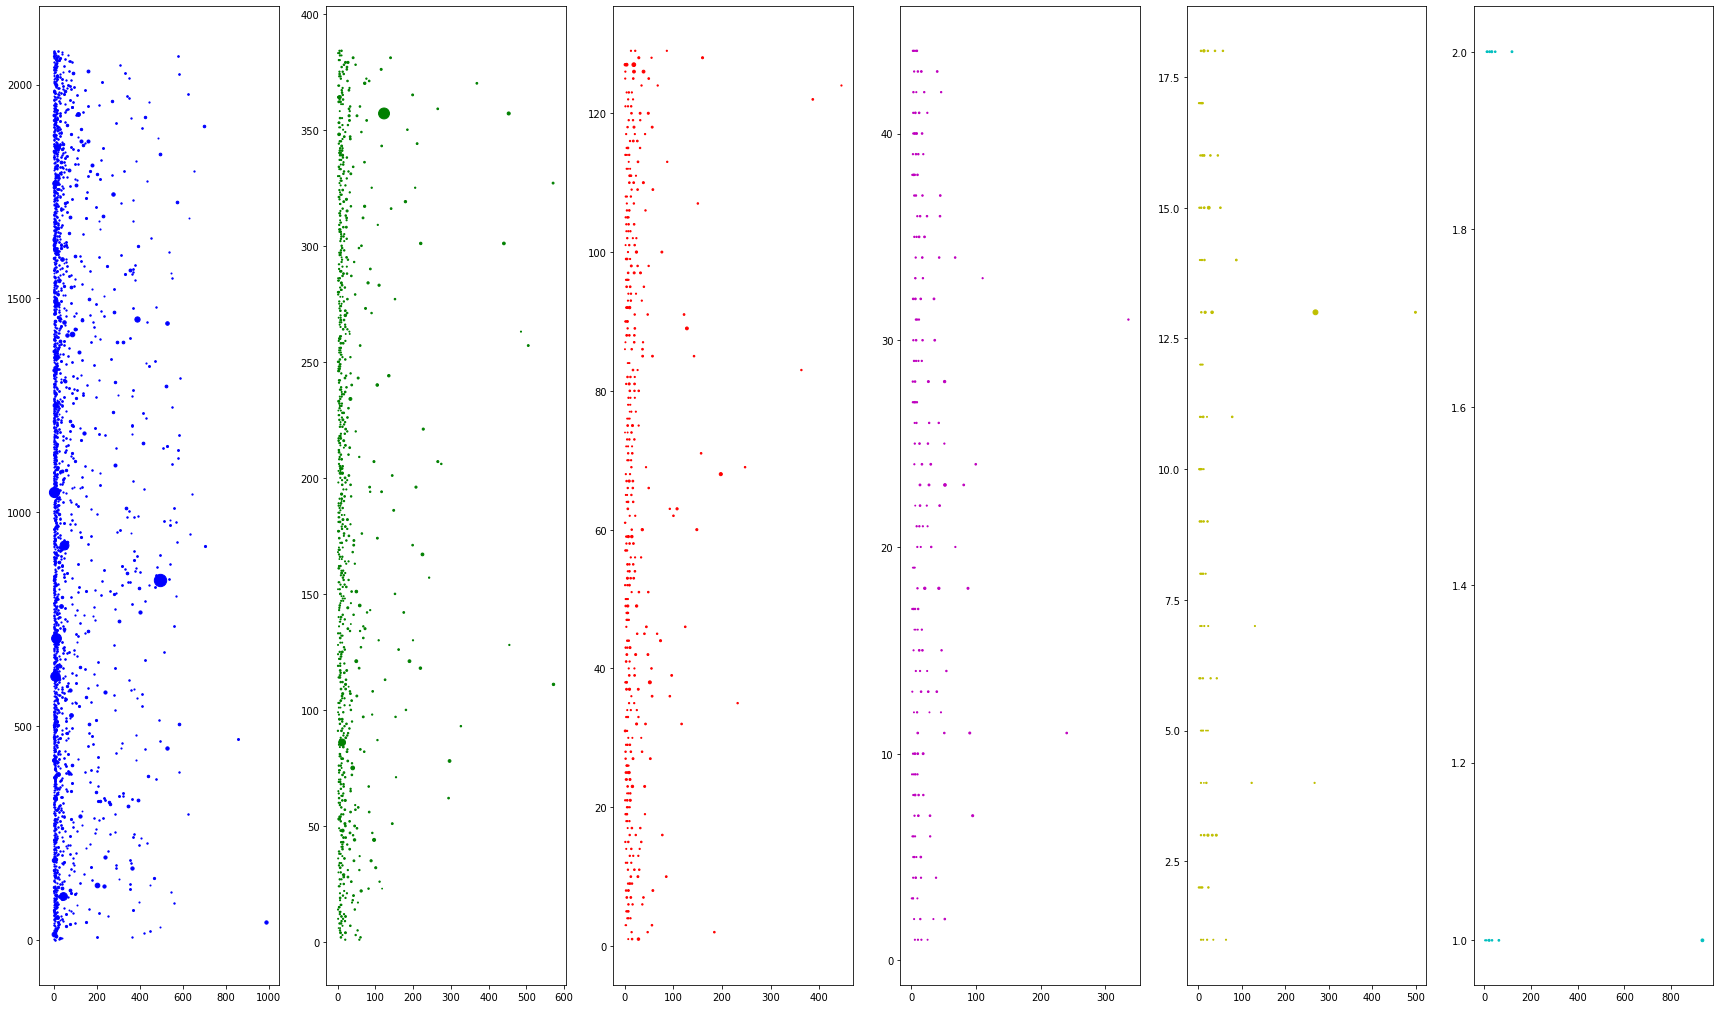

In [32]:
# what's up with the 5-planet systems...?
systems = []

idxs = np.arange(len(KOIs['kepid']))
kepids = np.array(KOIs['kepid'])
unique_kepid = np.sort(np.unique(np.array(KOIs['kepid'])))
print(len(unique_kepid))

np.random.seed(42)
unique_kepid_shuffle = np.random.permutation(unique_kepid)

unique_kepid_70 = np.sort(unique_kepid_shuffle[:int(0.7*len(unique_kepid_shuffle))])
unique_kepid_30 = np.sort(unique_kepid_shuffle[int(0.7*len(unique_kepid_shuffle)):])

print(len(unique_kepid_70))
print(len(unique_kepid_30))

kepids_toloop = unique_kepid
features = final_features
means = np.mean(features,axis=0)
sigmas = np.std(features,axis=0)

fig,axes = plt.subplots(1,6,figsize=(30,18))
"""n1s = 2079
n2s = 384
n3s = 129
n4s = 44
n5s = 18
n6s = 2
"""

n1s = 2211
n2s = 393
n3s = 132
n4s = 47
n5s = 18
n6s = 2

for ID in kepids_toloop:
    goodSystem = True
    system = [ID]
    thisSystem_mask = (kepids == ID)
    thisSystem_idxs = idxs[thisSystem_mask]
    
    kepNames = KOIs['kepoi_name'][thisSystem_idxs]
    Ps = KOIs['koi_period'][thisSystem_idxs]
    
    #sort KOIs from inner to outer
    sort = np.argsort(Ps)
    thisSystem_idxs = thisSystem_idxs[sort]

    count = KOIs['koi_count'][thisSystem_idxs[0]]
    
    if (np.max(Ps) > 350) & (count > 2):
        print(ID)
        print(count)
        
    if count == 1:
        axes[0].scatter(Ps[sort], np.ones_like(Ps)*n1s, s=KOIs['koi_prad'][thisSystem_idxs], color='b')
        n1s = n1s - 1
    elif count == 2:
        axes[1].scatter(Ps[sort], np.ones_like(Ps)*n2s, s=KOIs['koi_prad'][thisSystem_idxs], color='g')
        n2s = n2s - 1
    elif count == 3:
        axes[2].scatter(Ps[sort], np.ones_like(Ps)*n3s, s=KOIs['koi_prad'][thisSystem_idxs], color='r')
        n3s = n3s - 1
    elif count == 4:
        axes[3].scatter(Ps[sort], np.ones_like(Ps)*n4s, s=KOIs['koi_prad'][thisSystem_idxs], color='m')
        n4s = n4s - 1
    elif count == 5:
        axes[4].scatter(Ps[sort], np.ones_like(Ps)*n5s, s=KOIs['koi_prad'][thisSystem_idxs], color='y')
        n5s = n5s - 1
    elif count == 6:
        axes[5].scatter(Ps[sort], np.ones_like(Ps)*n6s, s=KOIs['koi_prad'][thisSystem_idxs], color='c')
        n6s = n6s - 1
        
plt.show()



In [17]:
11709124 in unique_kepid_70

False

In [35]:
systems = []

idxs = np.arange(len(KOIs['kepid']))
kepids = np.array(KOIs['kepid'])
unique_kepid = np.sort(np.unique(np.array(KOIs['kepid'])))
print(len(unique_kepid))

np.random.seed(42)
unique_kepid_shuffle = np.random.permutation(unique_kepid)

unique_kepid_70 = np.sort(unique_kepid_shuffle[:int(0.7*len(unique_kepid_shuffle))])
unique_kepid_30 = np.sort(unique_kepid_shuffle[int(0.7*len(unique_kepid_shuffle)):])

print(len(unique_kepid_70))
print(len(unique_kepid_30))

kepids_toloop = unique_kepid_30
features = final_features
means = np.mean(features,axis=0)
sigmas = np.std(features,axis=0)
savename = "./realPlanets_final/realKOIs_finalFeatures_30percent.txt"

for ID in kepids_toloop:
    goodSystem = True
    system = [ID]
    thisSystem_mask = (kepids == ID)
    thisSystem_idxs = idxs[thisSystem_mask]
    
    kepNames = KOIs['kepoi_name'][thisSystem_idxs]
    Ps = KOIs['koi_period'][thisSystem_idxs]
    #sort KOIs from inner to outer
    sort = np.argsort(Ps)
    thisSystem_idxs = thisSystem_idxs[sort]

    count = KOIs['koi_count'][thisSystem_idxs[0]]

    for j in range(1,count+1):
        planet = []
        
        for k in range(0,np.shape(features)[1]):
            planet.append( ((features[:,k][thisSystem_idxs[j-1]]) - means[k])/sigmas[k] )
            
        system.append((planet))

    systems.append(system)

print(len(systems))

print(type(systems))
print(type(systems[0]))
print(type(systems[0][0]))

with open(savename, "wb") as picklefile:
    pickle.dump(systems, picklefile)

2656
1859
797
797
<class 'list'>
<class 'list'>
<class 'numpy.int64'>


In [36]:
with open(savename, "rb") as picklefile:
    systest = pickle.load(picklefile)

print(len(systest))
print(type(systest))
print(type(systest[0]))
print(type(systest[0][0]))
print(systest[0:2])
print(systems[0:2])

797
<class 'list'>
<class 'list'>
<class 'numpy.int64'>
[[1161345, [0.17351902758821786, -0.8653344219876473, -0.3581574687006401, 0.7159458145015346]], [1432789, [-0.611257334213653, -0.8215512819230816, 0.3775135109798401, -0.4662363890712392], [0.2599205056183988, -0.30504109882318026, 0.3775135109798401, -0.4662363890712392]]]
[[1161345, [0.17351902758821786, -0.8653344219876473, -0.3581574687006401, 0.7159458145015346]], [1432789, [-0.611257334213653, -0.8215512819230816, 0.3775135109798401, -0.4662363890712392], [0.2599205056183988, -0.30504109882318026, 0.3775135109798401, -0.4662363890712392]]]


In [9]:
print(2079 + 2*384 + 3*129 + 4*44 + 5*18 + 6*2)

3512


In [10]:
print(2079+384+129+44+18+2)

2656


In [14]:
#number of *planets* in training and test, respectively
print(2459+1053)

3512
